# Statistical Inference for Means Lab

## Coral Genotype Growth Analysis

As a research assistant at a marine biology research center, you're helping analyze data from a coral restoration project. The center has been growing different genotypes of staghorn coral (Acropora cervicornis) in their nursery to determine which genetic strains show the best growth potential for reef restoration.

The research team has collected growth data (measured in centimeters of linear extension) over 1 year for 6 different coral genotypes. Initial fragments sizes were within .05cm of each other and only single tip fragments were used. Within the nursery 10 fragments from each genotype were placed on each growout tree (60 fragments total) for a total of 50 trees. This was done to try and control for any variation within the nursery setting.

Your task is to determine if there are significant differences in growth rates between these genotypes, which will help inform which strains should be prioritized for future restoration efforts.

## Data Overview

Data File: coral_growth.csv

Contains columns:
- Genotype (G1, G2, G3, G4, G5, G6)
- Growth_cm (linear extension in centimeters)

First, let's import the libraries we'll need for our analysis:



In [1]:
# CodeGrade step0
# Run this cell without changes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Step 1: Define Research Questions/Hypothesis

Defined below are several sets of null and alternative hypothesis based around the business problem presented in this lab. Which option given would be the best choice for this scenario and research question? Assign the letter as a string variable in the cell below.

Option A:
- Null Hypothesis (H₀): There are no differences in mean growth rates between any of the coral genotypes.
μ₁ = μ₂ = μ₃ = μ₄ = μ₅ = μ₆
- Alternative Hypothesis (H₁): At least two coral genotypes have different mean growth rates.
At least one μᵢ ≠ μⱼ (where i and j are different genotypes)

Option B:
- Null Hypothesis (H₀): Genotype 1 grows faster than all other genotypes.
μ₁ > μ₂, μ₃, μ₄, μ₅, μ₆
- Alternative Hypothesis (H₁): At least one genotype grows faster than Genotype 1.
At least one μᵢ > μ₁

Option C:
- Null Hypothesis (H₀): The coral genotypes will show similar growth patterns in the nursery.
- Alternative Hypothesis (H₁): The coral genotypes will show different growth patterns in the nursery.

Option D:
- Null Hypothesis (H₀): μG1 ≠ μG2 ≠ μG3 ≠ μG4 ≠ μG5 ≠ μG6
- Alternative Hypothesis (H₁): All genotypes have the same growth rate.

In [2]:
# CodeGrade step1
# Assign the variable letter "A", "B", "C", or "D"
hypothesis_choice = 'A'

### Step 2: Data Exploration

First, let's examine our data to understand the distribution of growth rates across genotypes. We have provided the code to load in the data for you but you are being asked to fill the code for rapid EDA.

In [3]:
# CodeGrade step0
# Run this cell without changes to load in data
# You will need to have downloaded the provided data file and placed it the same location as the notebook
df = pd.read_csv('coral_growth.csv')

In [4]:
# CodeGrade step2
# Use df.groupby() with agg() to calculate mean, std, count for each genotype
summary_stats = df.groupby('Genotype')['Growth_cm'].agg(['mean', 'std', 'count'])

In [5]:
# Run this cell without changes
print("Summary Statistics by Genotype:")
print(summary_stats)

Summary Statistics by Genotype:
              mean       std  count
Genotype                           
G1        2.502735  0.392501    500
G2        2.712730  0.391199    500
G3        3.043394  0.404099    500
G4        2.913275  0.393626    500
G5        2.395393  0.383826    500
G6        3.209274  0.402975    500


### Step 3: Data Visualization - Boxplot

Let's create a box plot to visualize the distribution of growth rates. Provide the following exact labels for your plot:
- y-axis: Growth (cm)
- x-axis: Coral Genotype
- title: Growth Rates by Coral Genotype

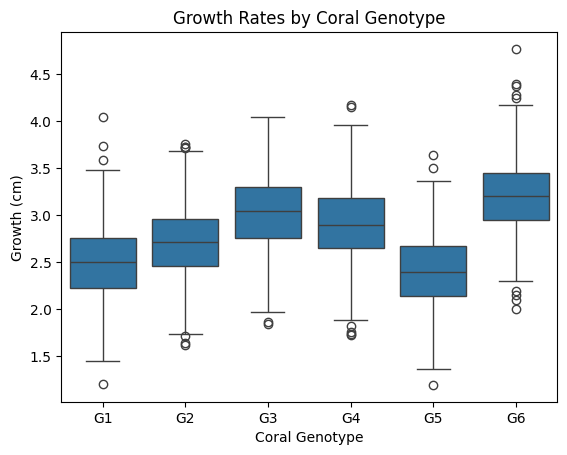

In [7]:
# CodeGrade step3
# Create a boxplot using seaborn
boxplot_answer = sns.boxplot(data=df, x='Genotype', y='Growth_cm')

# Provide appropriate labels
plt.title('Growth Rates by Coral Genotype')
plt.xlabel('Coral Genotype')
plt.ylabel('Growth (cm)')
plt.show()

### Step 4: Check Assumptions

Need to verify our data meets ANOVA's requirements.
- Group data is normal: Scipy documentation for [Shapiro-Wilk Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro)
- Group data has similar variance: Scipy documentation for [Levene Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

In [15]:
# CodeGrade step4
# Getting data for each group (should be a list of lists, or list of arrays)
groups = df.groupby('Genotype')['Growth_cm']
group_arrays = [group.values for _, group in groups]

normality = {}
# Loop through each genotype and save normality pvalue to dictionary
for idx, genotype in enumerate(group_arrays):
    stat, p_value = stats.shapiro(genotype)
    normality[f"Genotype {idx+1}"] = p_value

# Test homogeneity of variances
stat, p_value_var = stats.levene(*group_arrays)

In [16]:
# Run this cell without changes to display result
print("Testing Normality for Each Genotype:")
print(normality)
print(f"\nLevene's test for equal variances: p-value = {p_value_var:.3f}")

Testing Normality for Each Genotype:
{'Genotype 1': np.float64(0.40126905399330937), 'Genotype 2': np.float64(0.6757445730085936), 'Genotype 3': np.float64(0.5760081775714531), 'Genotype 4': np.float64(0.5762425580031849), 'Genotype 5': np.float64(0.9942109900815315), 'Genotype 6': np.float64(0.5492195298781957)}

Levene's test for equal variances: p-value = 0.939


### Step 5: Perform the ANOVA

Now you need to import and perform the one-way ANOVA. Use scipy.stats library for the ANOVA test.

Scipy documentation for [f_oneway ANOVA Test]((https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html))

In [24]:
# CodeGrade step5
# Import test function
from scipy.stats import f_oneway

# Perform one-way ANOVA
f_stat, anova_p = stats.f_oneway(*group_arrays)

In [25]:
# Run this cell without changes to display results
print("One-way ANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {anova_p:.4f}")

One-way ANOVA Results:
F-statistic: 320.3121
p-value: 0.0000


### Step 6: Post-hoc Analysis

Recall that the ANOVA is an Omnibus test, meaning that it cannot tell us where specific differences lie between each group. After performing the ANOVA and reciecing a significant result, you need to resort to a post-hoc test. Conduct a Tukey's HSD test to identify specific group differences.

Scipy documentation for [tukey_hsd Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html)

In [31]:
# CodeGrade step6
# Import the requires test function
from scipy.stats import tukey_hsd

# Perform Tukey's HSD test (you can use the 'groups' object)
result_hsd = tukey_hsd(*group_arrays)

In [32]:
# Run this cell without changes to display result
print(result_hsd)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.210     0.000    -0.281    -0.139
 (0 - 2)     -0.541     0.000    -0.612    -0.469
 (0 - 3)     -0.411     0.000    -0.482    -0.339
 (0 - 4)      0.107     0.000     0.036     0.179
 (0 - 5)     -0.707     0.000    -0.778    -0.635
 (1 - 0)      0.210     0.000     0.139     0.281
 (1 - 2)     -0.331     0.000    -0.402    -0.259
 (1 - 3)     -0.201     0.000    -0.272    -0.129
 (1 - 4)      0.317     0.000     0.246     0.389
 (1 - 5)     -0.497     0.000    -0.568    -0.425
 (2 - 0)      0.541     0.000     0.469     0.612
 (2 - 1)      0.331     0.000     0.259     0.402
 (2 - 3)      0.130     0.000     0.059     0.201
 (2 - 4)      0.648     0.000     0.577     0.719
 (2 - 5)     -0.166     0.000    -0.237    -0.095
 (3 - 0)      0.411     0.000     0.339     0.482
 (3 - 1)      0.201     0.000     0.129     0.272
 (3 - 2)     -0.130     0.000   

### Step 7: Effect Size Analysis
In statistical analysis, we're not just interested in whether there are differences between groups (which we test with ANOVA), but also in how large these differences are. Effect size helps us understand the practical significance of our results. For our coral growth study, we'll use eta-squared (η²), which tells us what proportion of the total variance in growth rates can be explained by genotype differences.

Calculate Eta-squared (η²)
- η² = SS_between / SS_total

Where:

- SS_between is the sum of squares between groups
- SS_total is the total sum of squares

Calculate this step by step:

In [34]:
# CodeGrade step7
# First, calculate the grand mean and group means
all_data = np.concatenate(group_arrays)
grand_mean = np.mean(all_data)

# Use groupby to get means for each as a pandas series (DO NOT use the same groupby object from above)
genotype_means = df.groupby('Genotype')['Growth_cm'].mean()

# Calculate SS_between (use more lines if needed)
ss_between = sum(len(group) * (np.mean(group) - grand_mean)**2 for group in group_arrays)

# Calculate SS_total
ss_total = sum((x - grand_mean)**2 for x in all_data)

# Calculate eta-squared
eta_squared = ss_between / ss_total
print(eta_squared)

0.3485016592988379


### Conclusion: Interpreting the Effect Size
Now let's interpret our eta-squared value. Generally, for eta-squared:

- Small effect: η² ≈ 0.01 (1% of variance explained)
- Medium effect: η² ≈ 0.06 (6% of variance explained)
- Large effect: η² ≈ 0.14 (14% of variance explained)

In [35]:
# Run this cell without changes to display the report result
analysis_report = f"""
Coral Growth Analysis Report

1. Data Overview:
Our analysis examined growth rates across six coral genotypes, with 500 samples total (50 trees × 10 fragments per genotype).
Initial exploration showed varying growth patterns among genotypes, with mean growth rates ranging from [X] to [Y] cm.

2. ANOVA Results:
The one-way ANOVA revealed significant differences in growth rates among genotypes (F = {f_stat:.4f}, p = {anova_p:.4f}).
The effect size (η² = {eta_squared:.4f}) indicates that approximately {eta_squared*100:.1f}% of the variance in growth rates is explained by genotype differences.

3. Post-hoc Analysis:
Tukey's HSD test identified major significant pairwise differences across all genotpyes indicting a strong relationship and warranting further investigations into genotypic diversity

4. Recommendations for Restoration Program:
Based on our analysis:
a) Genotype 6 showed the highest mean growth rate and consistent performance
b) Genotypes 3 and 4 also performed well and could be considered as secondary options
c) Genotype 5 showed the poorest performance and may not be suitable for large-scale restoration

6. Future Considerations:
- Consider running extended trials with top-performing genotypes
- Monitor environmental variables that might interact with genotype performance
- Investigate potential trade-offs between growth rate and other important characteristics (e.g., disease resistance)

This analysis provides strong statistical evidence for prioritizing certain genotypes in future restoration efforts, while maintaining genetic diversity through the use of multiple well-performing strains.
"""
print("Grand mean:", grand_mean)
print("\nGenotype means:")
print(genotype_means)
print(analysis_report)

Grand mean: 2.7961336676836672

Genotype means:
Genotype
G1    2.502735
G2    2.712730
G3    3.043394
G4    2.913275
G5    2.395393
G6    3.209274
Name: Growth_cm, dtype: float64

Coral Growth Analysis Report

1. Data Overview:
Our analysis examined growth rates across six coral genotypes, with 500 samples total (50 trees × 10 fragments per genotype). 
Initial exploration showed varying growth patterns among genotypes, with mean growth rates ranging from [X] to [Y] cm.

2. ANOVA Results:
The one-way ANOVA revealed significant differences in growth rates among genotypes (F = 320.3121, p = 0.0000). 
The effect size (η² = 0.3485) indicates that approximately 34.9% of the variance in growth rates is explained by genotype differences.

3. Post-hoc Analysis:
Tukey's HSD test identified major significant pairwise differences across all genotpyes indicting a strong relationship and warranting further investigations into genotypic diversity

4. Recommendations for Restoration Program:
Based on 